In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
from tqdm.auto import tqdm # progress bar visualization
import torch # machine learning

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Create the data
start = 0
step = 0.02
stop = 1

weight = 0.7
bias = 0.3

X = torch.arange(start=start, step=step, end=stop).unsqueeze(dim=1)
y = weight * X + bias

len(X), len(y)

(50, 50)

In [3]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
# Train test split
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

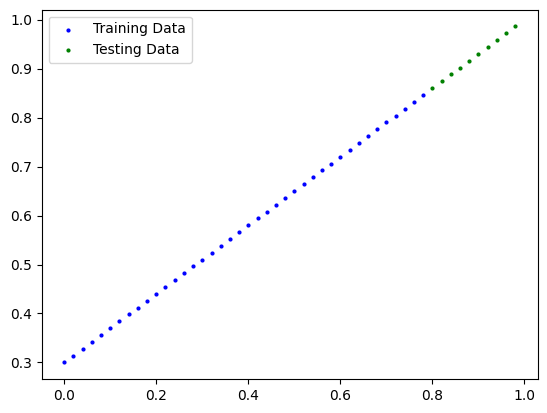

In [5]:
def plot_predictions(
    train_features=X_train,
    train_labels=y_train,
    test_features=X_test,
    test_labels=y_test,
    predictions=None
):
    # scatter plot the training data in blue
    plt.scatter(train_features, train_labels, c='b', s=4, label='Training Data')
    # scatter plot the testing data in green
    plt.scatter(test_features, test_labels, c='g', s=4, label='Testing Data')
    # check if there are predictions
    if predictions is not None:
        # scatter plot the predictions in red
        plt.scatter(test_features, predictions, c='r', s=4, label='Prediction Data')
    # show the legend
    plt.legend()


plot_predictions()

In [6]:
# Create the linear regression model
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.nn = torch.nn.Sequential(
            torch.nn.Linear(in_features=1, out_features=1),
            # torch.nn.Linear(in_features=2, out_features=1)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.nn(x)

model = LinearRegressionModel()
model

LinearRegressionModel(
  (nn): Sequential(
    (0): Linear(in_features=1, out_features=1, bias=True)
  )
)

In [7]:
# setup the loss function and the optimizer
criterion = torch.nn.L1Loss()
optimizer = torch.optim.SGD(
    params=model.parameters(),
    lr=0.01
)

In [8]:
with torch.inference_mode():
    untrained_preds = model(X_test)
untrained_preds[:10]

tensor([[-1.3719],
        [-1.3883],
        [-1.4047],
        [-1.4211],
        [-1.4374],
        [-1.4538],
        [-1.4702],
        [-1.4866],
        [-1.5030],
        [-1.5194]])

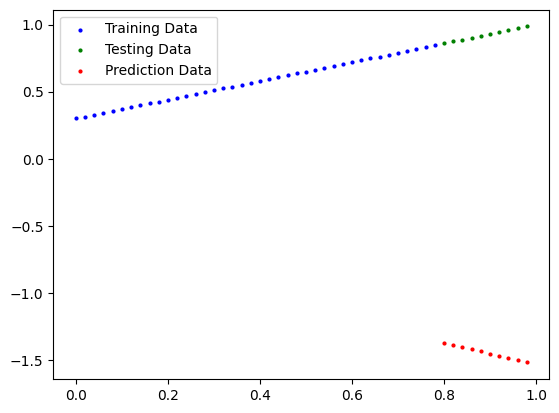

In [9]:
plot_predictions(predictions=untrained_preds)

In [10]:
# training and testing loop
epochs = 10000
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in tqdm(range(epochs)):
    # put the model in training mode
    model.train()
    # forward pass
    train_preds = model(X_train)
    # calculate the train loss
    train_loss = criterion(train_preds, y_train)
    # optimizer zero grad
    optimizer.zero_grad()
    # backpropagation
    train_loss.backward()
    # optimizer step
    optimizer.step()

    # put the model in evaluation mode
    model.eval()
    with torch.inference_mode(): # turn off gradient tracking
        # forward pass
        test_preds = model(X_test)
        # calculate the test loss
        test_loss = criterion(test_preds, y_test)
        if epoch % 1000 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(train_loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f'Epoch: {epoch} | Train Loss: {train_loss:.2f} | Test Loss: {test_loss:.2f}')

  0%|          | 0/10000 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 1.61 | Test Loss: 2.36
Epoch: 1000 | Train Loss: 0.00 | Test Loss: 0.01
Epoch: 2000 | Train Loss: 0.00 | Test Loss: 0.01
Epoch: 3000 | Train Loss: 0.00 | Test Loss: 0.01
Epoch: 4000 | Train Loss: 0.00 | Test Loss: 0.01
Epoch: 5000 | Train Loss: 0.00 | Test Loss: 0.01
Epoch: 6000 | Train Loss: 0.00 | Test Loss: 0.01
Epoch: 7000 | Train Loss: 0.00 | Test Loss: 0.01
Epoch: 8000 | Train Loss: 0.00 | Test Loss: 0.01
Epoch: 9000 | Train Loss: 0.00 | Test Loss: 0.01


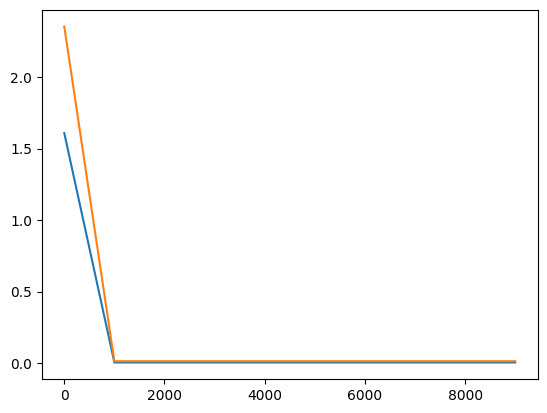

In [11]:
# Epoch loss curves
plt.plot(epoch_count, train_loss_values, label='Training Loss Curve')
plt.plot(epoch_count, test_loss_values, label='Testing Loss Curve')

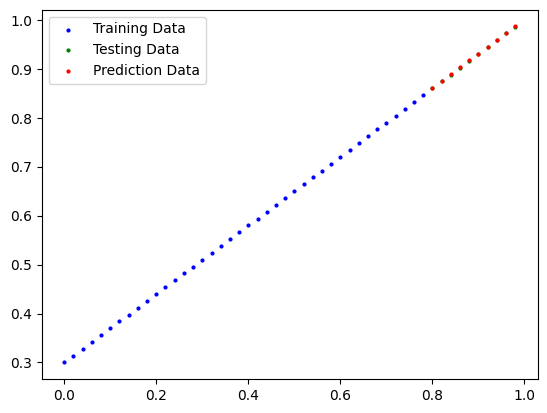

In [12]:
with torch.inference_mode():
    predictions = model(X_test)

plot_predictions(predictions=predictions)

In [13]:
print('The model learned the following weights and bias')
print(model.state_dict())

The model learned the following weights and bias
OrderedDict([('nn.0.weight', tensor([[0.6943]])), ('nn.0.bias', tensor([0.3059]))])
